In [ ]:
# The following command can be copy-pasted to CLI but it does not really download a catalogue
# Currently it is not used
java -jar stilts.jar tapquery \
  tapurl="http://tapvizier.cds.unistra.fr/TAPVizieR/tap" \
  adql='SELECT * FROM "VIII/92/first14"' \
  ofmt=fits \
  out=./first14.fits

In [ ]:
#For step3 cooking on one source

# The following codes are for single catalogue, just for reference
# # 2.  After filtering, adjust the groupIDs accordingly
# java -jar $stilts_dir tgroup in="filtered_r1" \
#     keys=GroupID \
#     aggcols="0;count;GroupCount" \
#     out=group_count.fits
# java -jar $stilts_dir tpipe in=group_count.fits \
#     cmd='select "GroupCount == 1"' \
#     out=singleton_groupids.fits

# java -jar $stilts_dir tmatch2 \
#     in1=filtered_r1.fits \
#     in2=singleton_groupids.fits \
#     matcher=exact \
#     join=all1 \
#     values1=GroupID values2=GroupID \
#     out=temp_with_gcount.fits

# java -jar $stilts_dir tpipe \
#     in=temp_with_gcount.fits \
#     cmd='addcol GroupID "!NULL_GroupID_1 ? GroupID_1 : NULL"' \
#     cmd='delcols GroupID_2' \
#     cmd='delcols GroupID_1' \
#     out=temp_with_gcount.fits
# exit

# #Note, if you don't specify the !NULL option, stilts will treat the ELSE condition (when GroupCount is NULL) as NULL, so it will give GroupSize = NULL rather than keeping the original GroupSize value.
# rpl_cmd='replacecol GroupSize "!NULL_GroupCount && GroupCount == 1 ? 1 : GroupSize"'
# # This may overlappipng with the previous command, but it is necessary to ensure that GroupSize is set to 1 for singleton groups.
# rpl_cmd2='replaceval NULL 1 "GroupSize"'
# java -jar $stilts_dir tpipe ifmt=fits \
#     in=temp_with_gcount.fits \
#     cmd="$rpl_cmd" \
#     cmd="$rpl_cmd2" \
#     out=filtered_r1_CLN.fits

# # 3. Flag the high-z and single matched sources as tier 1

# flag_cmd1='addcol source_tier "GroupSize==1 && Z_o1>=3 ? 1 : 0"'
# # flag_cmd2='replacecol source_tier "source_tier == 0 && group_z_min > 3 ? 2 : 0"'
# # flag_cmd3='replacecol source_tier "source_tier == 0 && group_z_min <= 3 && Z_o1>=3 ? 3 : 0"'
# java -jar $stilts_dir tpipe ifmt=fits in=filtered_r1_CLN.fits \
#     cmd="$flag_cmd1" \
#     out=mr1_t1.fits

# cook the grouped sources
# java -jar $stilts_dir tgroup \
#     in=filtered_r3.fits \
#     keys=GroupID \
#     aggcols='Z_o1;max;group_z_max Z_o1;min;group_z_min 0;count;GroupSize' \
#     out=group_zcheck.fits

# java -jar $stilts_dir tpipe \
#     in=group_zcheck.fits \
#     cmd='select "!NULL_GroupID && GroupSize > 1 && group_z_max > 3"' \
#     cmd='keepcols "GroupID group_z_min"' \
#     out=r3_group_hz_sources.fits

# java -jar $stilts_dir tmatch2 \
#     in1=filtered_r3.fits \
#     in2=r3_group_hz_sources.fits \
#     matcher=exact \
#     join=all1 \
#     find=all \
#     values1=GroupID values2=GroupID \
#     ocmd='delcols "GroupID GroupSize"' \
#     ocmd='addcol GroupID "!NULL_GroupID_1 ? GroupID_1 : NULL"' \
#     ocmd='addcol GroupSize "!NULL_GroupSize_1 ? GroupSize_1 : NULL"' \
#     ocmd='delcols "GroupID_1 GroupID_2 GroupSize_1"' \
#     out=filtered_r3_Tier23.fits

#         #    cmd='replacecol source_tier (
#         # source_tier < 2 && GroupID_NULL ? source_tier :
#         # (source_tier < 2 && z_min > 3 ? 3 :
#         # (source_tier < 2 ? 2 : source_tier)))' \
# exit

In [2]:
from astropy.io import fits
import pandas as pd

# 读取 FITS 文件
file_path = 'final_matched_highz_catalogue.fits'  # TOPCAT 保存的 FITS 文件路径
with fits.open(file_path) as hdul:
    data = hdul[1].data  # 星表数据通常在第一个扩展（HDU 1）中
    df = pd.DataFrame(data)  # 转换为 Pandas DataFrame

# 查看列名和前几行
print(df.columns)
print(df.head())

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'source_tier_first', 'FIRST_r1', 'Fpeak_r1', 'Fint_r1', 'Rms_r1',
       'source_tier_nvss', 'NVSS_r2', 'S1.4_r2', 'e_S1.4_r2',
       'source_tier_gleam', 'GLEAM_r3', 'Fpwide_r3', 'e_Fpwide_r3',
       'Fintwide_r3', 'e_Fintwide_r3', 'source_tier_racs', 'RACS-DR1_r4',
       'Fpk_r4', 'e_Fpk_r4', 'Ftot_r4', 'e_Ftot_r4'],
      dtype='object')
            sdss_name   sdss_ra  sdss_dec    sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189 -4.750661  3.274816          PIPE   
1  000023.29+014501.8  0.097058  1.750519  3.097035          PIPE   
2  000051.56+001202.5  0.214857  0.200716  3.865000            VI   
3  000154.27+094414.9  0.476156  9.737474  4.858996          PIPE   
4  000200.93-033605.6  0.503886 -3.601581  3.154000            VI   

   source_tier_first          FIRST_r1  Fpeak_r1  Fint_r1  Rms_r1  ...  \
0                  1  J000017.3-044501      1.69     1.23   0.152  ...   
1             

In [4]:
columns = [
    "FIRST_r1", "NVSS_r2", "GLEAM_r3", "RACS-DR1_r4",
    "Fpeak_r1", "Fint_r1", "Rms_r1", "S1.4_r2", "e_S1.4_r2",
    "Fpwide_r3", "e_Fpwide_r3", "Fintwide_r3", "e_Fintwide_r3",
    "Fpk_r4", "e_Fpk_r4", "Ftot_r4", "e_Ftot_r4"
]

new_columns = [
    "FIRST", "NVSS", "GLEAM", "RACS-DR1",
    "Fpeak_first", "Fint_first", "Rms_first", "S1.4_nvss", "e_S1.4_nvss",
    "Fpwide_gleam", "e_Fpwide_gleam", "Fintwide_gleam", "e_Fintwide_gleam",
    "Fpk_racs", "e_Fpk_racs", "Ftot_racs", "e_Ftot_racs"
]
df.rename(columns={old: new for old, new in zip(columns, new_columns)}, inplace=True)
print(df.head())

            sdss_name   sdss_ra  sdss_dec    sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189 -4.750661  3.274816          PIPE   
1  000023.29+014501.8  0.097058  1.750519  3.097035          PIPE   
2  000051.56+001202.5  0.214857  0.200716  3.865000            VI   
3  000154.27+094414.9  0.476156  9.737474  4.858996          PIPE   
4  000200.93-033605.6  0.503886 -3.601581  3.154000            VI   

   source_tier_first             FIRST  Fpeak_first  Fint_first  Rms_first  \
0                  1  J000017.3-044501         1.69        1.23      0.152   
1                  1  J000023.2+014501         2.36        2.02      0.084   
2                  1  J000051.5+001202         2.74        2.64      0.103   
3                  1  J000154.2+094414         6.83        6.85      0.120   
4                  1  J000200.9-033605         4.56        5.24      0.162   

   ...  Fpwide_gleam e_Fpwide_gleam  Fintwide_gleam  e_Fintwide_gleam  \
0  ...           NaN            NaN        

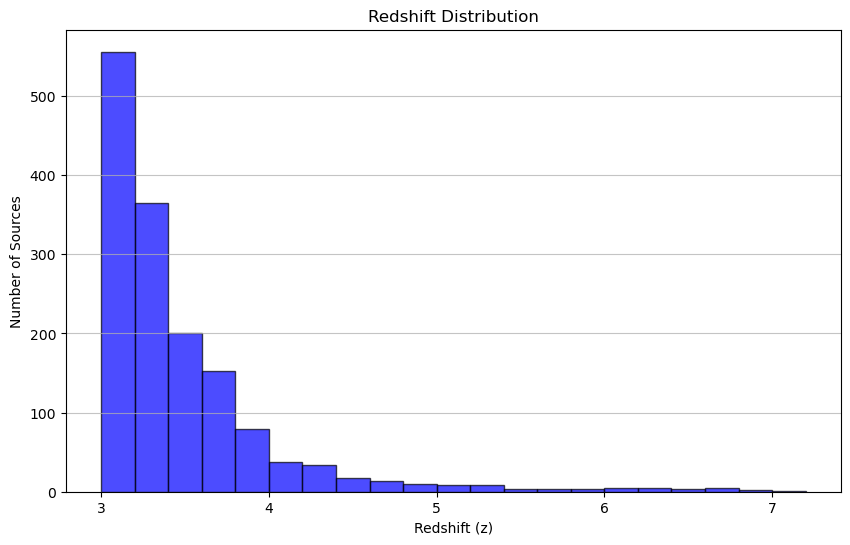

In [10]:
from matplotlib import pyplot as plt

#draw the hitogram figure for redshift distribution
plt.figure(figsize=(10, 6))
# start from z= 3 and ends at z= 7.2, bin width is 0.2
plt.hist(df['sdss_z'], bins=21, range=(3, 7.2), color='blue', alpha=0.7, edgecolor='black')
plt.title('Redshift Distribution')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Sources')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [13]:
# show the numbers of every redshift range
# z>3 is 1515
# check z>4 
print("Number of sources with z > 3:", len(df[df['sdss_z'] >= 3]))
# check z>4
print("Number of sources with z > 4:", len(df[df['sdss_z'] >= 4]))
# check z>5
print("Number of sources with z > 5:", len(df[df['sdss_z'] >= 5]))
# check z>6
print("Number of sources with z > 6:", len(df[df['sdss_z'] >= 6]))
# check z>7
print("Number of sources with z > 7:", len(df[df['sdss_z'] >= 7]))
# for a statistical check, just look for source_tier_first =1 source with each redshift range
print("Number of sources with z > 3 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 3) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 3 and source_tier_first = 1
print("Number of sources with z > 4 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 4) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 5 and source_tier_first = 1
print("Number of sources with z > 5 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 5) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 6 and source_tier_first = 1
print("Number of sources with z > 6 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 6) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 7 and source_tier_first = 1
print("Number of sources with z > 7 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 7) & (df['source_tier_first'] == 1)]))





Number of sources with z > 3: 1515
Number of sources with z > 4: 161
Number of sources with z > 5: 49
Number of sources with z > 6: 22
Number of sources with z > 7: 1
Number of sources with z > 3 and source_tier_first = 1: 1346
Number of sources with z > 4 and source_tier_first = 1: 150
Number of sources with z > 5 and source_tier_first = 1: 44
Number of sources with z > 6 and source_tier_first = 1: 19
Number of sources with z > 7 and source_tier_first = 1: 1
